In [75]:
import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
%matplotlib notebook

#Configurable parameters for pure pursuit
+ How fast do you want the robot to move? It is fixed at $v_{max}$ in this exercise
+ When can we declare the goal has been reached?
+ What is the lookahead distance? Determines the next position on the reference path that we want the vehicle to catch up to

In [61]:
vmax = 0.75
goal_threshold = 0.05
lookahead = 1.0

In [63]:
#You know what to do!
def simulate_unicycle(pose, v,w, dt=0.1):
    x, y, t = pose
    return x + v*np.cos(t)*dt, y + v*np.sin(t)*dt, t+w*dt

In [64]:
class PurePursuitTracker(object):
    def __init__(self, x, y, v, lookahead = 3.0):
        """
        Tracks the path defined by x, y at velocity v
        x and y must be numpy arrays
        v and lookahead are floats
        """
        self.length = len(x)
        self.ref_idx = 0 #index on the path that tracker is to track
        self.lookahead = lookahead
        self.x, self.y = x, y
        self.v, self.w = v, 0

    def update(self, xc, yc, theta):
        """
        Input: xc, yc, theta - current pose of the robot
        Update v, w based on current pose
        Returns True if trajectory is over.
        """
        
        #Calculate ref_x, ref_y using current ref_idx
        #Check if we reached the end of path, then return TRUE
        #Two conditions must satisfy
        #1. ref_idx exceeds length of traj
        #2. ref_x, ref_y must be within goal_threshold
        # Write your code to check end condition
        ref_x, ref_y = self.x[self.ref_idx], self.y[self.ref_idx]
        goal_x, goal_y = self.x[-1], self.y[-1]
        if (self.ref_idx > self.length) and \
            (np.linalg.norm([ref_x-goal_x, ref_y-goal_y])) < goal_threshold:
              return True
        
        #End of path has not been reached
        #update ref_idx using np.hypot([ref_x-xc, ref_y-yc]) < lookahead
        if (np.hypot(ref_x-xc, ref_y-yc) < lookahead):
          self.ref_idx = self.ref_idx + 1    

        #Find the anchor point
        # this is the line we drew between (0, 0) and (x, y)
        anchor = np.asarray([ref_x - xc, ref_y - yc])
        #Remember right now this is drawn from current robot pose
        #we have to rotate the anchor to (0, 0, pi/2)
        #code is given below for this
        theta = np.pi/2 - theta
        rot = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        anchor = np.dot(rot, anchor)
        
        L = (anchor[0] ** 2 + anchor[1] **2) # dist to reference path
        X = anchor[0] #cross-track error
        #from the derivation in notes, plug in the formula for omega
        self.w = -(2*vmax*X)/L
        
        return False

## Visualize given trajectory

In [71]:
x = np.arange(0, 50, 0.5)
y = [np.sin(idx / 5.0) * idx / 2.0 for idx in x]

#write code here


In [58]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

In [59]:
y

[0.0,
 0.02495835416170704,
 0.09933466539753061,
 0.22164015499600465,
 0.3894183423086505,
 0.5992819232552538,
 0.8469637100925531,
 1.1273809526659593,
 1.4347121817990456,
 1.7624855466618377,
 2.1036774620197414,
 2.450820240168947,
 2.796117257901679,
 3.131564102605877,
 3.4490740549596106,
 3.740606199765204,
 3.9982944121660204,
 4.214575444422992,
 4.382314338951878,
 4.494925416515219,
 4.546487134128409,
 4.531849174906587,
 4.446730221007746,
 4.287804970016142,
 4.0527790833069055,
 3.7404509006497286,
 3.350758916839517,
 2.884814191578351,
 2.3449170510913357,
 1.7345576368013726,
 1.058400060449004,
 0.32225013385800133,
 -0.4669931474206407,
 -1.3014019766817977,
 -2.1720993672280655,
 -3.0693532422841736,
 -3.982683989653672,
 -4.900984303403564,
 -5.812649963955829,
 -6.705720052043744,
 -7.5680249530792825,
 -8.387340388410205,
 -9.151545610342676,
 -9.84878382005664,
 -10.467622812784676,
 -10.997213823732341,
 -11.42744654178484,
 -11.749098276378184,
 -11.95397

## Run the tracker simulation

1. Instantiate the tracker class
2. Initialize some starting pose
3. Simulate robot motion 1 step at a time - get $v$, $\omega$ from tracker, predict new pose using $v$, $\omega$, current pose in simulate_unicycle()
4. Stop simulation if tracker declares that end-of-path is reached
5. Record all parameters

In [72]:
#write code to instantiate the tracker class
tracker = PurePursuitTracker(x,y,vmax) 
pose = -1, 0, np.pi/2 #arbitrary initial pose
x0,y0,t0 = pose # record it for plotting
traj =[]
while True:
    #write the usual code to obtain successive poses
    pose = simulate_unicycle(pose, tracker.v, tracker.w)
    if tracker.update(*pose):
        print("ARRIVED!!")    
        break
    traj.append([*pose, tracker.w, tracker.ref_idx])

IndexError: ignored

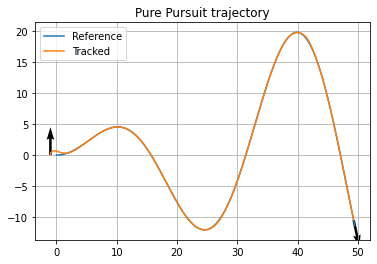

In [73]:
xs,ys,ts,ws,ids = zip(*traj)
plt.figure()
plt.plot(x,y,label='Reference')
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.plot(xs,ys,label='Tracked')
x0,y0,t0 = pose
plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
plt.title('Pure Pursuit trajectory')
plt.legend()
plt.grid()

# Visualize curvature

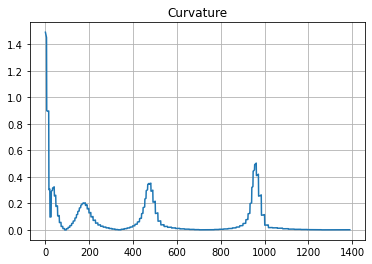

In [74]:
plt.figure()
plt.title('Curvature')
plt.plot(np.abs(ws))
plt.grid()


## Animate

Make a video to plot the current pose of the robot and reference pose it is trying to track. You can use funcAnimation in matplotlib

In [98]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()


def animate(t):
    plt.cla()
    plt.plot(x-t,y,label='Reference')
    plt.quiver(x0,y0, np.cos(t0), np.sin(t0),scale=12)
    plt.legend()   
matplotlib.animation.FuncAnimation(fig, animate, frames=10)


## Effect of noise in simulations

What happens if you add a bit of Gaussian noise to the simulate_unicycle() output? Is the tracker still robust?

The noise signifies that $v$, $\omega$ commands did not get realized exactly
